<IPython.core.display.Javascript object>


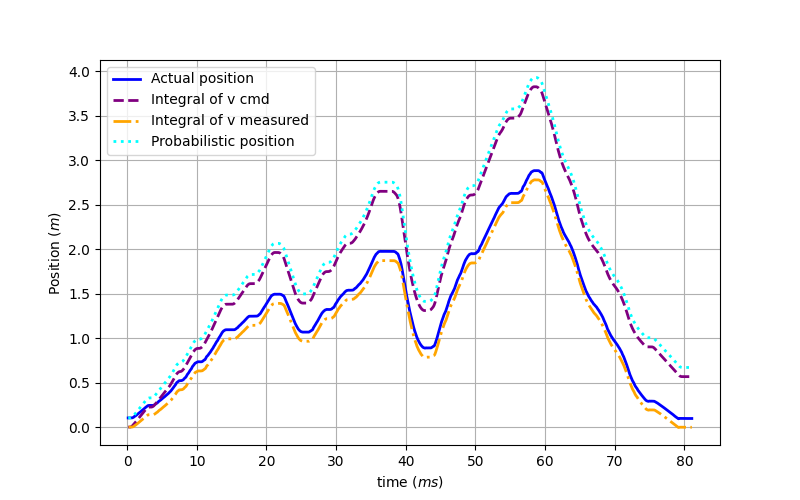

<IPython.core.display.Javascript object>


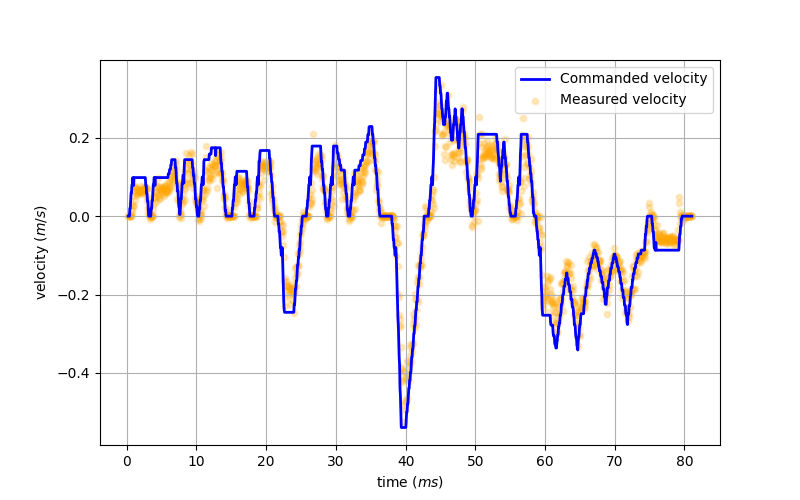

<IPython.core.display.Javascript object>


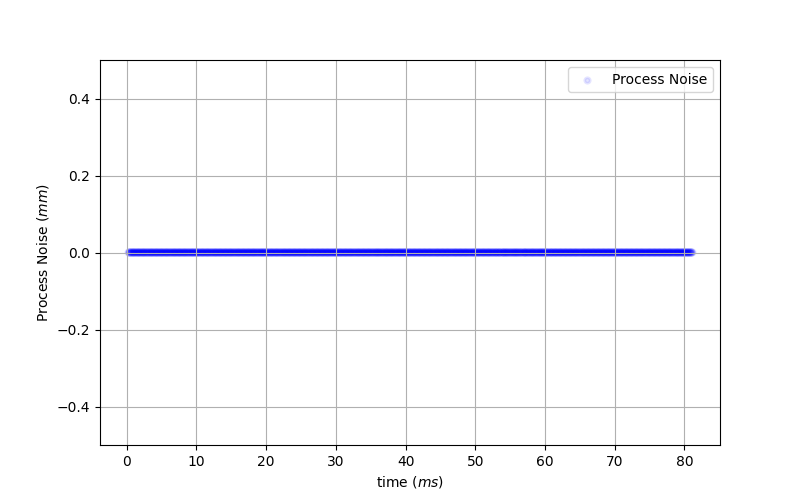

In [5]:
"""Motion model
    Part 1.2"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as it
import scipy.signal
from numpy import *
from matplotlib.pyplot import subplots, show
%matplotlib notebook 

# Load data
filename = 'training2.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
index, time, distance, vel_cmd, raw_ir1, raw_ir2,\
raw_ir3, raw_ir4, sonar1, sonar2 = data.T

# arrays init
v_mes= [] #vel measured
v_mes = np.array(v_mes, dtype = np.float64)#array to arr of floats

dt_arr= [] #dt arr
dt_arr = np.array(dt_arr, dtype = np.float64)#array to arr of floats

v_cmd= [] #vel commanded
v_cmd = np.array(v_cmd, dtype = np.float64)#array to arr of floats
v_cmd=np.append(v_cmd,vel_cmd)
v_cmd = np.delete(v_cmd, 0, axis=None) #del 1st term to keep size

t_motion= [] #timeline array ([0] index decimated)
t_motion = np.array(v_mes, dtype = np.float64)#array to arr of floats
t_motion=np.append(t_motion,time)
t_motion = np.delete(t_motion, 0, axis=None) #del 1st term to keep size

#calculate vel measured array
for i in range(1, len(distance)):
    deltaT = time[i] - time[i-1]
    dt_arr = np.append(dt_arr,deltaT)#store in dt array
    v_mes=np.append(v_mes,(distance[i]-distance[i-1])/deltaT)#store in velocity array

#integration
p_Vcmd = it.cumtrapz(vel_cmd,time,initial=0)
p_Vmes = it.cumtrapz(v_mes,t_motion,initial=0)

#Probabilistic motion model 

#variables
# taken from sensor models
w_err = (deltaT**2)*0.1 #noise errors vel(from lecture notes)
v_err = 0.0284 # noise errors in pos (from sensors (IR1,3+sonar1))

p_prob= [] # probabilistic position
p_prob = np.array(p_prob, dtype = np.float64)#arr of floats
p_prob = np.append(p_prob,(distance[0])) # initial know pos

w_noise= [] # process noise erro arr
w_noise = np.array(w_noise, dtype = np.float64)

def g_1(x_pri, u_pri, dt): #motion model
    
    return u_pri*dt #crude motion model

def motion_model (x_pri, u_pri, w, dt):

    return x_pri+ g_1(x_pri, u_pri, dt) + w - 0.00036665


#calculate probabilistic motion array and its process noise
for i in range(1, len(distance)):
    prior_pos = p_prob[i-1]
    p_prob = np.append(p_prob,motion_model(prior_pos,vel_cmd[i-1],w_err,dt_arr[i-1]))
    w_noise = np.append(w_noise,(p_prob[i]-p_prob[i-1]-g_1(prior_pos,vel_cmd[i-1],dt_arr[i-1]))) # initial know pos
    
    
# position over time plot
plt.figure()
plt.rcParams["figure.figsize"] = (8,5) #inches
plt.plot(time, distance,'-',linewidth=2, \
         color='blue', label='Actual position')
plt.plot(time, p_Vcmd,'--',linewidth=2, \
         color='purple', label='Integral of v cmd')
plt.plot(t_motion, p_Vmes,'-.',linewidth=2, \
         color='orange', label='Integral of v measured')
plt.plot(time, p_prob,':',linewidth=2, \
         color='cyan', label='Probabilistic position')
plt.ylabel('Position $(m)$')#label graph
plt.xlabel('time $(ms)$')
plt.grid(True)
plt.legend()
show()


# Velocity over time plot
plt.figure()
plt.rcParams["figure.figsize"] = (8,5) #inches
plt.plot(t_motion, v_cmd,'-',linewidth=2, \
         color='blue', label='Commanded velocity')
plt.scatter(t_motion, v_mes,s=15,linewidth=2, \
         color='orange', label='Measured velocity', alpha=0.2)
plt.ylabel('velocity $(m/s)$')#label graph
plt.xlabel('time $(ms)$')
plt.grid(True)
plt.legend()
show()

# Process Noise error over time.
plt.figure()
plt.ylim(bottom=-0.5, top=0.5)
plt.rcParams["figure.figsize"] = (8,5) #inches
plt.scatter(t_motion, w_noise*1000,s=15,linewidth=2, \
         color='blue', label='Process Noise', alpha=0.1)
plt.ylabel('Process Noise $(mm)$')#label graph
plt.xlabel('time $(ms)$')
plt.grid(True)
plt.legend()
show()

In [4]:
# print(sum(w_noise)/len(w_noise))
std_w_noise = np.std(w_noise)# Standard Deviacion 
var_w_noise = std_w_noise**2 #variance
print(var_w_noise)


2.054223748872572e-32
